## Part 1: Data Structuring and Exploratory Time Series Analysis

### Import libraries

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Ingestion and Validation

#### 1.1 Load all .txt files in a Dictionary

In [4]:
# Creating the list of tickers for using in the loop
tickers = ["aapl", "msft", "jpm", "xom", "pfe", "gld", "agg", "spy"]

# Creating a dictionary to store each DataFrame
stock = {}

# Looping through the tickers to read each stock file
for t in tickers:
    fname = f"{t}.us.txt"   # dynamically setting the filename pattern with f-string notation
    df = pd.read_csv(fname, sep=",")  # 'comma' is the separator in the .txt files and each file is read into a DataFrame
    stock[t.upper()] = df    # the ticker names will be stored in uppercase

All the stock files have been stored in a dictionary as it is easier to trace back the stock names in the dictionary with simply their tickers

#### 1.2 Import the daily 'Close' prices for the seven portfolio assets and the SPY benchmark

In [11]:
# Creating a dictionary to store the 'Close' prices of the portfolio assets and the SPY benchmark
close_stock = {}

for t in tickers:
    df = stock[t.upper()]
    df["Date"] = pd.to_datetime(df["Date"]) # 'Date' column is parsed here
    df = df.set_index("Date") # 'Date' is set as index
    close_stock[t.upper()] = df["Close"] # Extracting the close prices with 'Date' as index

# Combining into one DataFrame
prices = pd.concat(close_stock, axis=1)

# Setting the time period to 2010–2015
prices = prices.loc["2010-01-01":"2015-12-31"]

In [12]:
print(prices.head())

              AAPL    MSFT     JPM     XOM     PFE     GLD     AGG     SPY
Date                                                                      
2010-01-04  27.406  25.954  35.711  55.968  14.818  109.80  87.221  98.728
2010-01-05  27.454  25.963  36.404  56.188  14.607  109.70  87.617  98.986
2010-01-06  27.017  25.803  36.603  56.675  14.557  111.51  87.566  99.040
2010-01-07  26.968  25.535  37.329  56.497  14.503  110.82  87.465  99.478
2010-01-08  27.147  25.712  37.240  56.270  14.619  111.37  87.519  99.810


#### 1.3 Data validation check

In [13]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2010-01-04 to 2015-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1510 non-null   float64
 1   MSFT    1510 non-null   float64
 2   JPM     1510 non-null   float64
 3   XOM     1510 non-null   float64
 4   PFE     1510 non-null   float64
 5   GLD     1509 non-null   float64
 6   AGG     1509 non-null   float64
 7   SPY     1509 non-null   float64
dtypes: float64(8)
memory usage: 106.2 KB
None


All the price columns are in ***float*** datatype

In [23]:
print(f"Count of Missing Values:\n\n{prices.isna().sum()}")

Count of Missing Values:

AAPL    0
MSFT    0
JPM     0
XOM     0
PFE     0
GLD     1
AGG     1
SPY     1
dtype: int64


There is one missing value in each of the 'GLD', 'AGG', 'SPY' columns. 

In [25]:
# Handling missing values with forward fill method 
prices_ffill = prices.ffill()
print(f"Count of New Missing Values:\n\n{prices_ffill.isna().sum()}")

Count of New Missing Values:

AAPL    0
MSFT    0
JPM     0
XOM     0
PFE     0
GLD     0
AGG     0
SPY     0
dtype: int64


A ***forward fill*** method is used to handle missing values. Since these are stock closing prices, the immediate previous day's value can be a reasonable estimate for the current day's value. 

>**Caveat:** There can still be cases when an event completely changes the course of a stock price movement. Such cases are not considered in this assignment. 

### Step 2: Performance Benchmarking and Visualization 

#### 2.1 Normalize the daily closing prices

In [30]:
normalized_prices = prices_ffill / prices_ffill.iloc[0] * 100
print(normalized_prices.head())

                  AAPL        MSFT         JPM         XOM         PFE  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.175144  100.034677  101.940579  100.393082   98.576056   
2010-01-06   98.580603   99.418201  102.497830  101.263222   98.238629   
2010-01-07   98.401810   98.385605  104.530817  100.945183   97.874207   
2010-01-08   99.054951   99.067581  104.281594  100.539594   98.657039   

                   GLD         AGG         SPY  
Date                                            
2010-01-04  100.000000  100.000000  100.000000  
2010-01-05   99.908925  100.454019  100.261324  
2010-01-06  101.557377  100.395547  100.316020  
2010-01-07  100.928962  100.279749  100.759663  
2010-01-08  101.429872  100.341661  101.095940  


#### 2.2 Generate a single, publication-quality line plot

In [39]:
# Calculating the percentage growth of the daily returns
daily_returns = prices_ffill.pct_change().fillna(0) # Considering the first % growth as 0 for ease of further calculation

# Calculating the cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() * 100 

print(f"Cumulative Returns:\n\n{cumulative_returns.head()}")

Cumulative Returns:

                  AAPL        MSFT         JPM         XOM         PFE  \
Date                                                                     
2010-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2010-01-05  100.175144  100.034677  101.940579  100.393082   98.576056   
2010-01-06   98.580603   99.418201  102.497830  101.263222   98.238629   
2010-01-07   98.401810   98.385605  104.530817  100.945183   97.874207   
2010-01-08   99.054951   99.067581  104.281594  100.539594   98.657039   

                   GLD         AGG         SPY  
Date                                            
2010-01-04  100.000000  100.000000  100.000000  
2010-01-05   99.908925  100.454019  100.261324  
2010-01-06  101.557377  100.395547  100.316020  
2010-01-07  100.928962  100.279749  100.759663  
2010-01-08  101.429872  100.341661  101.095940  


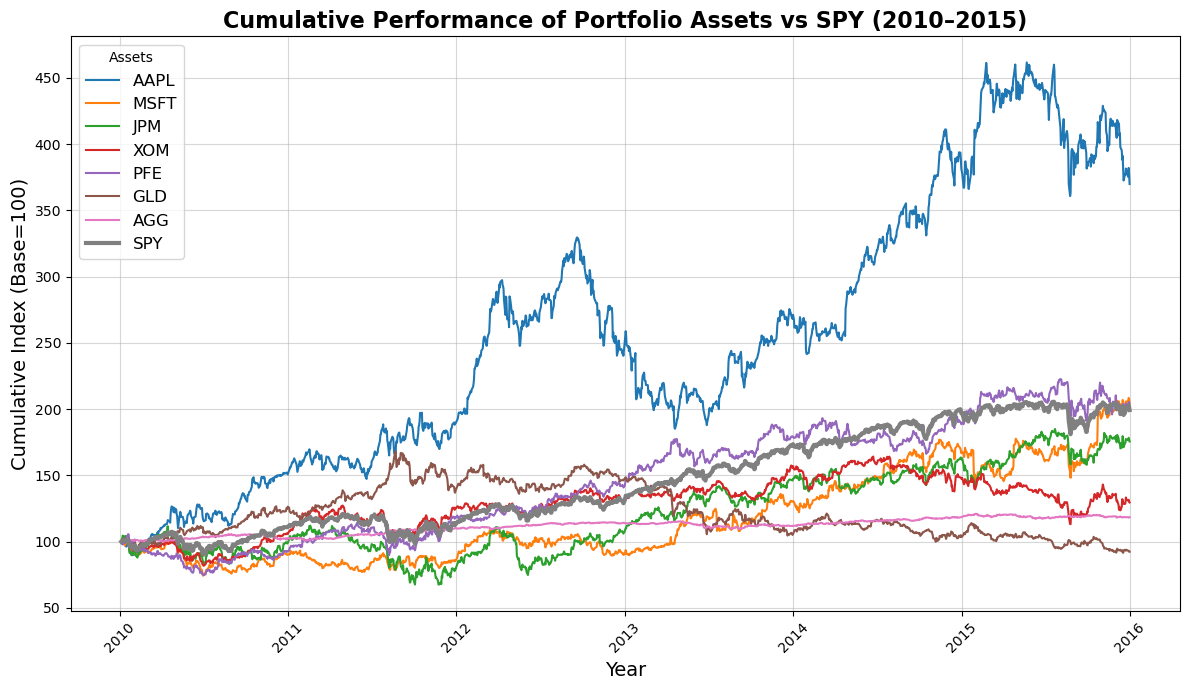

In [51]:
# Plotting the single line plot

plt.figure(figsize=(12, 7))
for col in cumulative_returns.columns:
    if col == 'SPY':
        plt.plot(cumulative_returns.index, cumulative_returns[col], linewidth=3, label=col, color="gray")  # highlighting the 'SPY' column more
    else:
        plt.plot(cumulative_returns.index, cumulative_returns[col], linewidth=1.5, label=col)

plt.title("Cumulative Performance of Portfolio Assets vs SPY (2010–2015)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cumulative Index (Base=100)", fontsize=14)
plt.legend(title="Assets", fontsize=12)
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### 2.3 Initial Insights

Compared to the market benchmark 'SPY':
* **AAPL** consistently outperformed 
* **MSFT** and **JPM** consistently underperformed
* **XOM** was moving very closely to the benchmark upto 2013 after which it kept underperforming
* **PFE** very closely resembled the benchmark's movement
* Although **GLD** was outperforming the benchmark upto 2013, it's performance significantly went downhill after this
* **AGG** had a stable performance all throughout, consistently underperforming

## Part 2: Advanced Risk, Return, and Dependency Analysis

### Step 3: Annualized Risk-Return Profiling

#### 3.1 Annualized mean daily return and daily volatility

In [77]:
mean_daily_return = (1 + daily_returns).prod()**(1/len(daily_returns)) - 1
annualized_mean_return = ((1 + mean_daily_return) ** 252 - 1) * 100

annualized_volatility = daily_returns.std() * np.sqrt(252) * 100

# Combining into a summary table
summary_stats = pd.DataFrame({
    "Annualized Mean Daily Return (%)": annualized_mean_return.round(2),
    "Annualized Daily Volatility (%)": annualized_volatility.round(2)
})

print(summary_stats)

      Annualized Mean Daily Return (%)  Annualized Daily Volatility (%)
AAPL                             24.39                            26.62
MSFT                             12.68                            23.22
JPM                               9.85                            27.59
XOM                               4.42                            18.89
PFE                              12.45                            18.82
GLD                              -1.31                            17.36
AGG                               2.87                             3.55
SPY                              12.20                            15.79


#### 3.2 Scatter plot of mean daily return and daily volatility

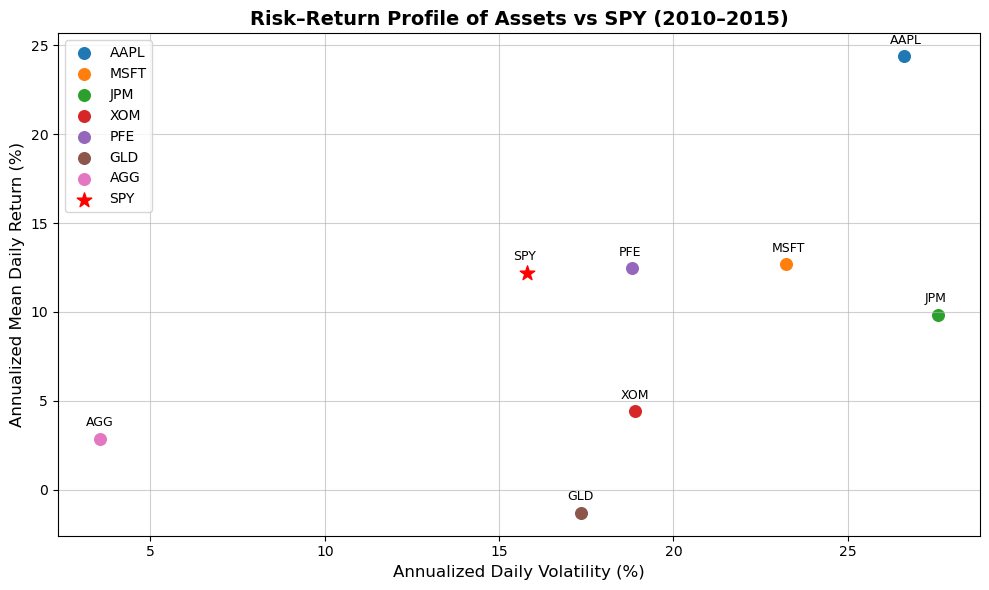

In [81]:
plt.figure(figsize=(10, 6))

for asset in summary_stats.index: # Setting the 'x' and 'y' variables for each asset using 'for' loop
    x = summary_stats.loc[asset, "Annualized Daily Volatility (%)"]
    y = summary_stats.loc[asset, "Annualized Mean Daily Return (%)"]
    
    if asset == "SPY": # Adding a different marker for SPY
        plt.scatter(x, y, color="red", s=120, marker="*", label="SPY")
    else:
        plt.scatter(x, y, s=70, label=asset)

    plt.text(x-0.4, y+0.7, asset, fontsize=9) # Adding ticker names next to each scatter point

plt.title("Risk–Return Profile of Assets vs SPY (2010–2015)", fontsize=14, fontweight="bold")
plt.xlabel("Annualized Daily Volatility (%)", fontsize=12)
plt.ylabel("Annualized Mean Daily Return (%)", fontsize=12)
plt.grid(True, alpha=0.6)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### 3.3 Initial Insights
* **None of the assets** are more efficient than the benchmark as none of them gives a higher return for the same level of risk of the benchmark or a lower level of risk for the same level of return
* **AGG** is less risky but it gives lower return than the benchmark, so it is not very efficient
* **GLD** is only slightly more risky than the benchmark but it's return is also very less, so it is also not efficient

### Step 4: Correlation Structure and Diversification Potential

#### 4.1 Correlation matrix of the daily returns

In [85]:
# Keeping only the seven portfolio assets (exclude SPY)
portfolio_assets = ["AAPL", "MSFT", "JPM", "XOM", "PFE", "GLD", "AGG"]

daily_returns_portfolio = daily_returns[portfolio_assets]

correlation_matrix = daily_returns_portfolio.corr()

print("Correlation Matrix of Daily Returns:\n")
print(correlation_matrix.round(5))

Correlation Matrix of Daily Returns:

         AAPL     MSFT      JPM      XOM      PFE      GLD      AGG
AAPL  1.00000  0.38128  0.35610  0.35547  0.32513  0.07970 -0.17251
MSFT  0.38128  1.00000  0.48195  0.49137  0.41261  0.02676 -0.18321
JPM   0.35610  0.48195  1.00000  0.59470  0.49413 -0.00171 -0.31357
XOM   0.35547  0.49137  0.59470  1.00000  0.54212  0.10394 -0.26164
PFE   0.32513  0.41261  0.49413  0.54212  1.00000  0.01632 -0.18524
GLD   0.07970  0.02676 -0.00171  0.10394  0.01632  1.00000  0.19939
AGG  -0.17251 -0.18321 -0.31357 -0.26164 -0.18524  0.19939  1.00000


#### 4.2 Visualize with a heatmap

<Figure size 800x600 with 0 Axes>

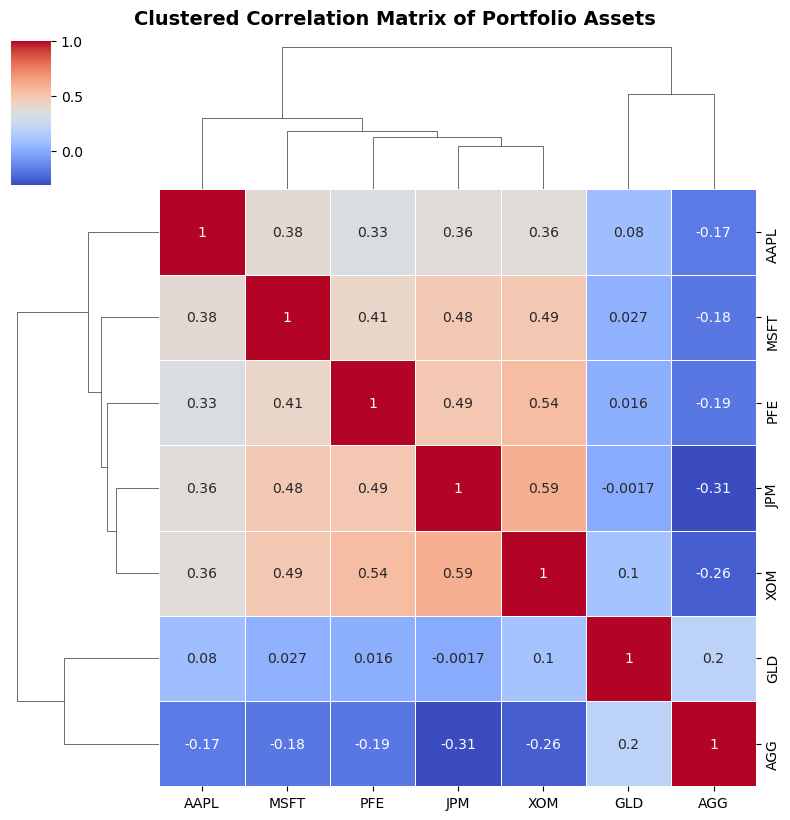

In [98]:
# Creating a clustered heatmap to better show the connections among clusters
plt.figure(figsize=(8,6))
sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, figsize=(8,8))
plt.suptitle("Clustered Correlation Matrix of Portfolio Assets", fontsize=14, fontweight="bold", y=1.02)
plt.show()

#### 4.3 Initial Insights
* Two main groups are identified: (1) the company assets and (2) the fixed income and commodity assets
* From the given company assets, **AAPL** has the *lowest* correlation with all other assets
* **XOM** is closely related with **JPM** (0.595) and **PFE** (0.542)
* **GLD** has low correlations with all equities
* **AGG** has negative correlations with all equities

### Step 5: Dynamic Market Risk (Rolling Beta)

#### 5.1 1-year (252-day) rolling beta of JPMorgan Chase (`JPM`) against the `SPY` benchmark.

In [120]:
rolling_cov = daily_returns['JPM'].rolling(252).cov(daily_returns['SPY']) # Rolling covariance of JPM with SPY

rolling_var = daily_returns['SPY'].rolling(252).var() # Rolling variance of SPY benchmark

rolling_beta = rolling_cov / rolling_var

print("Rolling Beta of JPM with SPY:")
print(rolling_beta.tail())

Rolling Beta of JPM with SPY:
Date
2015-12-24    1.217240
2015-12-28    1.217718
2015-12-29    1.216171
2015-12-30    1.217852
2015-12-31    1.217537
dtype: float64


#### 5.2 Plot the rolling beta

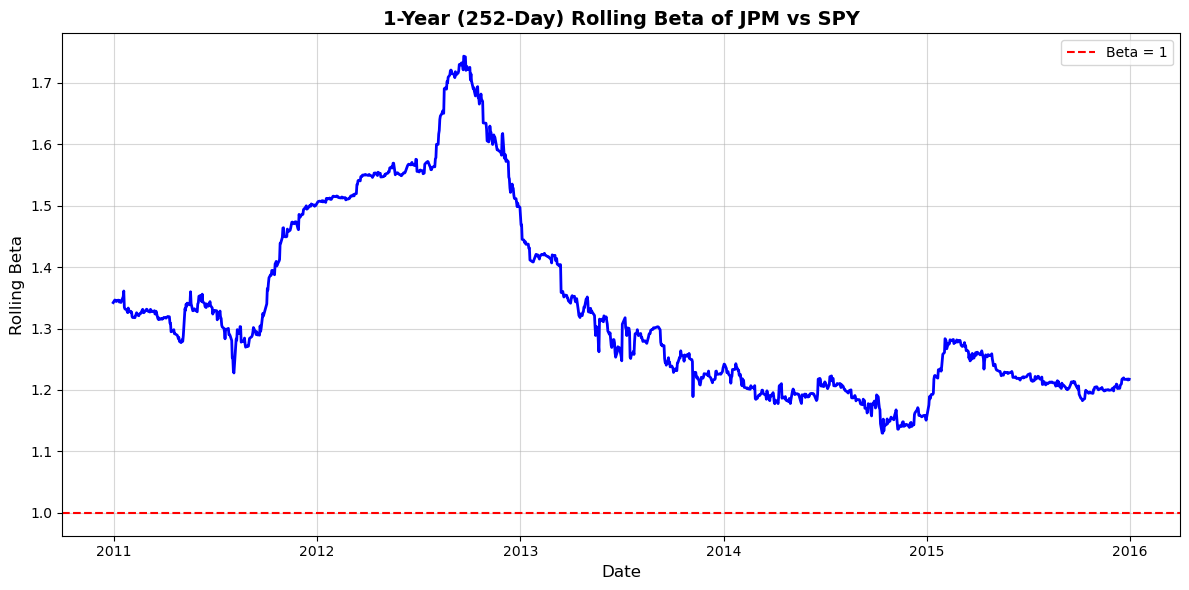

In [112]:
plt.figure(figsize=(12,6))
plt.plot(rolling_beta, color='blue', linewidth=2)
plt.title("1-Year (252-Day) Rolling Beta of JPM vs SPY", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Rolling Beta", fontsize=12)
plt.grid(True, alpha=0.5)
plt.axhline(1, color='red', linestyle='--', linewidth=1.5, label='Beta = 1')  # drawing Beta=1 line to see if JPM is more or less volatile than SPY
plt.legend()
plt.tight_layout()
plt.show()

#### 5.3 Initial Insights
* Rolling beta of JPM is always more than 1, meaning it is **more volatile** than the market
* From the end of 2011, till the middle of 2012, rolling beta kept increasing
* It reached a peak towards the end of 2012
* It then kept declining till the end of 2014
* It initially increased in the start of 2015 but then again kept decreasing 

## Part 3: Portfolio Optimization and Strategic Recommendation

### Step 6: Stochastic Portfolio Simulation (Monte Carlo)

#### 6.1 Monte Carlo simulation for weight combinations

In [125]:
num_portfolios = 20000 # number of simulations

num_assets = 7 # number of assets

np.random.seed(42)

weights = np.random.rand(num_portfolios, num_assets) # generating random weights
weights = weights / weights.sum(axis=1)[:, np.newaxis] # normalizing weights and adding an extra column to change from 1D to 2D data

# Converting to DataFrame
asset_names = ["AAPL", "MSFT", "JPM", "XOM", "PFE", "GLD", "AGG"]
portfolio_weights = pd.DataFrame(weights, columns=asset_names)

print(portfolio_weights.head()) # displaying the first 5 simulated portfolios' weight

       AAPL      MSFT       JPM       XOM       PFE       GLD       AGG
0  0.123774  0.314181  0.241901  0.197838  0.051559  0.051551  0.019195
1  0.205711  0.142761  0.168163  0.004889  0.230347  0.197700  0.050429
2  0.071889  0.072513  0.120289  0.207475  0.170780  0.115144  0.241910
3  0.050667  0.106113  0.133070  0.165654  0.285191  0.072525  0.186780
4  0.174419  0.013676  0.178874  0.050206  0.019153  0.279371  0.284302


#### 6.2 Portfolio metrics (returns, volatility, Sharpe ratio)

In [149]:
rf = 0.015 # risk-free rate

# Covariance matrix of daily returns
daily_returns_portfolio = daily_returns[["AAPL","MSFT","JPM","XOM","PFE","GLD","AGG"]]
cov_matrix = daily_returns_portfolio.cov()

# Creating empty lists to store portfolio metrics
port_returns = []
port_volatility = []
port_sharpe = []

for i in range(num_portfolios):
    w = portfolio_weights.iloc[i].values  # portfolio weights

    # Portfolio annualized returns
    port_daily_returns = daily_returns_portfolio.dot(w) # multiplying daily returns with weights 
    port_mean_daily_returns = (np.prod(1 + port_daily_returns))**(1/len(port_daily_returns)) - 1
    port_annual_ret = (1 + port_mean_daily_returns)**252 - 1
    port_returns.append(port_annual_ret)
    
    # Portfolio annualized volatility
    annual_vol = np.sqrt(np.dot(w.T, np.dot(cov_matrix * 252, w)))
    port_volatility.append(annual_vol)
    
    # Sharpe Ratio
    sharpe = (port_annual_ret - rf) / annual_vol
    port_sharpe.append(sharpe)

# Converting to a DataFrame
portfolio_metrics = pd.DataFrame({
    'Portfolio Return (%)': np.array(port_returns)*100,
    'Portfolio Volatility (%)': np.array(port_volatility)*100,
    'Sharpe Ratio': port_sharpe
}).round(2)

print(portfolio_metrics.head())

   Portfolio Return (%)  Portfolio Volatility (%)  Sharpe Ratio
0                 12.14                     17.02          0.63
1                 12.63                     13.84          0.80
2                  8.52                     10.86          0.65
3                  9.70                     12.30          0.67
4                  8.23                     10.19          0.66


#### 6.3 Scatter plot of simulation results

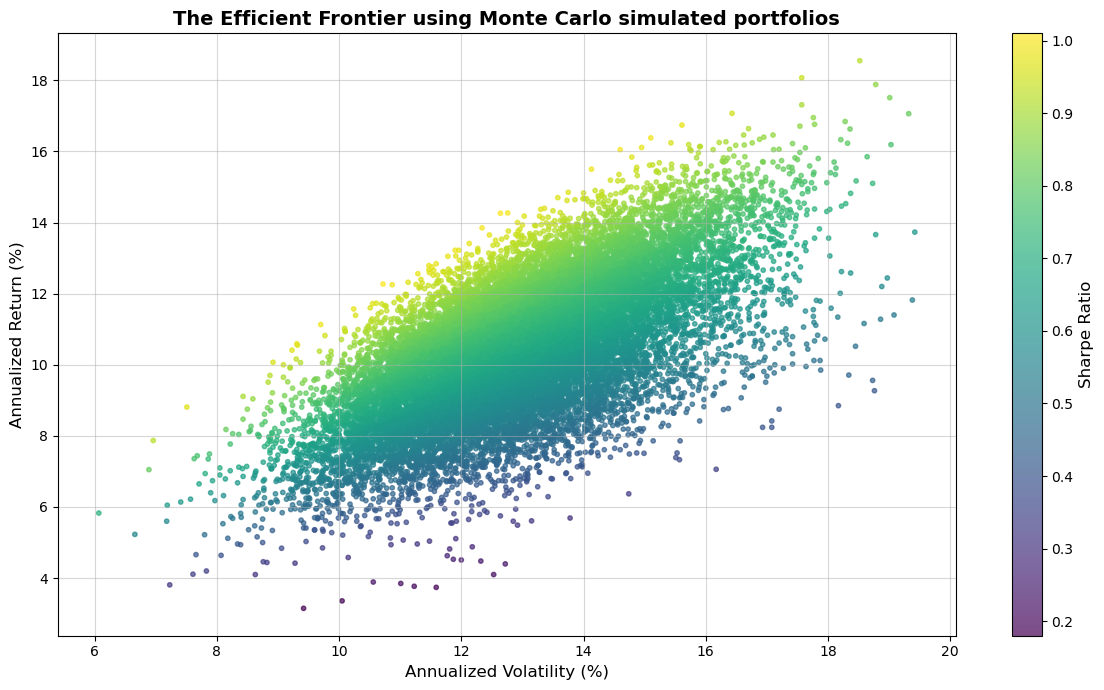

In [137]:
plt.figure(figsize=(12,7))

sc = plt.scatter(
    portfolio_metrics['Portfolio Volatility (%)'],  # x-axis: Annualized volatility; 
    portfolio_metrics['Portfolio Return (%)'],      # y-axis: Annualized return; 
    c=portfolio_metrics['Sharpe Ratio'],  # Color by Sharpe ratio
    cmap='viridis',                       # Color map
    s=10, alpha=0.7                             
)

# Adding colorbar to show Sharpe ratio
cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio', fontsize=12)

plt.title("The Efficient Frontier using Monte Carlo simulated portfolios", fontsize=14, fontweight='bold')
plt.xlabel("Annualized Volatility (%)", fontsize=12)
plt.ylabel("Annualized Return (%)", fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Step 7: Optimal Allocation and Final Recommendation

#### 7.1 Specific asset weights for the Maximum Sharpe Ratio Portfolio

In [146]:
# Identifying the index of the maximum Sharpe ratio
max_sharpe_idx = portfolio_metrics['Sharpe Ratio'].idxmax()

# Extracting the corresponding weights
max_sharpe_weights = portfolio_weights.iloc[max_sharpe_idx]

# Displaying the weights
print("Maximum Sharpe Ratio Portfolio Weights (%):")
print((max_sharpe_weights * 100).round(2))

Maximum Sharpe Ratio Portfolio Weights (%):
AAPL    35.82
MSFT     2.03
JPM      5.16
XOM      1.92
PFE     22.72
GLD      1.98
AGG     30.37
Name: 881, dtype: float64


#### 7.2 Visualization of optimal allocation

In [150]:
# Converting weights to percentages
max_sharpe_weights_pct = (max_sharpe_weights * 100).round(2)

# Creating a DataFrame for clear visualization
max_sharpe_table = pd.DataFrame({
    'Asset': max_sharpe_weights_pct.index,
    'Weight (%)': max_sharpe_weights_pct.values
})

print(max_sharpe_table)

  Asset  Weight (%)
0  AAPL       35.82
1  MSFT        2.03
2   JPM        5.16
3   XOM        1.92
4   PFE       22.72
5   GLD        1.98
6   AGG       30.37


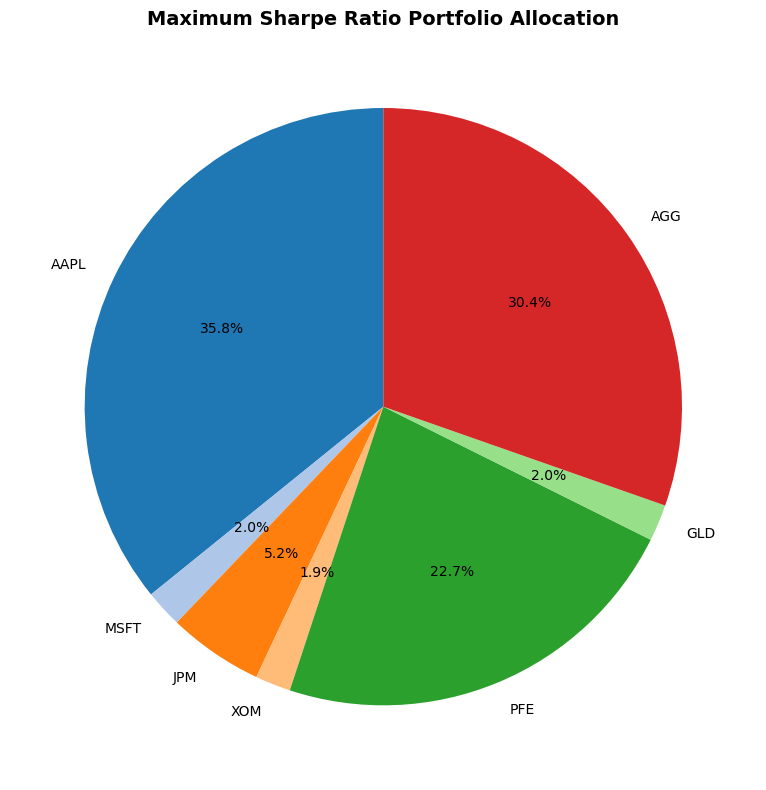

In [157]:
plt.figure(figsize=(8,8))
plt.pie(
    max_sharpe_weights_pct,
    labels=max_sharpe_weights_pct.index,
    autopct='%1.1f%%',      # showing percentages on slices
    startangle=90,          # rotating for better presentation
    colors=plt.cm.tab20.colors  # using a visually aesthetic color palette
)
plt.title("Maximum Sharpe Ratio Portfolio Allocation", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

>Maximum allocation (35.8%) is in **AAPL** followed by **AGG** (30.4%) and then **PFE** (22.7%)